In [1]:
import cv2
import numpy as np

### 卷积操作

+ filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
    + ddepth：卷积后的位深，一般是-1，与原图保持一致
    + kernel
    + anchor: 卷积核的中心点默认（-1，-1）
    + delta：默认0，相当于bias
    + borderType：边界类型一半不设

In [11]:
img = cv2.imread('cat.jpeg')

# kernel必须是float类型
kernel = np.ones((5,5), np.float32) / 25

# -1 表示卷积之后图片形状不限
new = cv2.filter2D(img,-1,kernel)
cv2.imshow('new and img', np.hstack((new,img)))

print(img.shape, new.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

(480, 640, 3) (480, 640, 3)


### 测试不同卷积核

In [25]:
# 轮廓
img = cv2.imread('cat.jpeg')
lunkuo = np.float32([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
new = cv2.filter2D(img,-1,lunkuo)
cv2.imshow('new and img', np.hstack((new,img)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# 浮雕
img = cv2.imread('cat.jpeg')
fudiao = np.float32([[-2,1,0],[-1,1,1],[0,1,2]])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
new = cv2.filter2D(img,-1,fudiao)
cv2.imshow('new and img', np.hstack((new,img)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# 锐化
img = cv2.imread('cat.jpeg')
ruihua = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])
new = cv2.filter2D(img,-1,ruihua)
cv2.imshow('new and img', np.hstack((new,img)))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 方盒滤波
+ boxFilter(src, ddepth, ksize[, dst[, [anchor[, normalize[, borderType]]]])
+ blur(src, ksize[, dst[, anchor[, borderType]]])均值滤波

方盒滤波的卷积核是固定的

![方盒滤波](方盒滤波.png)

In [32]:
# 方盒滤波
img = cv2.imread('cat.jpeg')
new = cv2.boxFilter(img,-1,(5,5),normalize=True)
cv2.imshow('new ', new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
# 均值滤波
img = cv2.imread('cat.jpeg')
new = cv2.blur(img,(3,3))
cv2.imshow('new ', new)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 高斯滤波
卷积核的数字符合高斯分布
<font size=15>
$
G(x,y) = \frac {1} {2 \pi \sigma^2 } e^{- \frac {x^2 + y^2} {2 \sigma^2}}
$
</font>

+ GaussianBlur(src, ksize, sigmaX[,dst[,sigmaY[,borderType]]])
    + sigmaX: X轴的标准差
    + sigmaY: Y轴的标准差
    + 如果没有指定sigma值，会分别从ksize的宽度和高度中计算sigma

选择不同的sigma，sigma越大，平滑效果越明显
举例：

计算（0，0）坐标点对应的值
x=y=0,规定sigma=1.5

In [37]:
1 / (2 * np.pi * 1.5 ** 2)

0.0707355302630646

![高斯分布](高斯分布.png)
![高斯核](高斯核.png)

In [45]:
# 注意：有些高斯模板是在归一化之后除以左上角的值，然后取整
img = cv2.imread('lena.jpg')
print('sigma越大平滑效果越明显，也越模糊')
cat1 = cv2.GaussianBlur(img,ksize=(5,5),sigmaX=0)
cat2 = cv2.GaussianBlur(img,ksize=(5,5),sigmaX=1.)
cat3 = cv2.GaussianBlur(img,ksize=(5,5),sigmaX=10.)
cat4 = cv2.GaussianBlur(img,ksize=(5,5),sigmaX=100)
cv2.imshow('sigma 0 1 10 100 ', np.hstack((cat1, cat2, cat3, cat4)))

cv2.waitKey(0)
cv2.destroyAllWindows()

sigma越大平滑效果越明显，也越模糊


### 中值滤波
中值滤波对椒盐噪音效果最明显

(512, 512, 3)


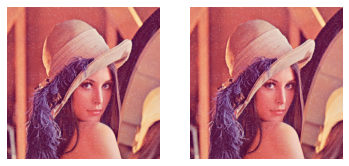

In [80]:
papper = cv2.imread('papper.png')
print(papper.shape)

b, g, r = cv2.split(papper)
image1 = cv2.merge((r,g,b))

b = papper[:,:,0].copy()
g = papper[:,:,1].copy()
r = papper[:,:,2].copy()
image = papper.copy()
image[:,:,0] = r
image[:,:,1] = g
image[:,:,2] = b

import matplotlib.pyplot as plt

plt.subplot(121)
plt.axis('off') # 不关闭会影响显示
plt.imshow(image)
plt.subplot(122)
plt.axis('off') # 不关闭会影响显示
plt.imshow(image1)

In [68]:
new = cv2.medianBlur(papper,ksize=5)
cv2.imshow('mediaBlur and papper', np.hstack((new,papper)))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 双边滤波
双边滤波（Bilateral filter）是一种非线性的滤波方法，
是结合图像的空间邻近度和像素值相似度的一种折衷处理，
同时考虑空域信息和灰度相似性，达到保边去噪的目的。

双边滤波器之所以能够做到在平滑去噪的同时还能够很好的保存边缘（Edge Preserve）

双边滤波可以保留边缘，同时可以对边缘内的区域平滑处理。（美颜）

原理就是一个与空间相关的高斯函数与一个灰度距离相关的高斯函数相乘 -> 高斯卷积\*灰度距离的卷积\*像素点卷积

+ bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
    + d: kernel_size
    + sigmaColor:计算像素信息使用的sigma
    + sigmaSpace:计算空间信息使用的sigma

In [90]:
# img = cv2.imread('papper.png') # 双边滤波对椒盐噪声几乎没效果
img = cv2.imread('lena.jpg')
new = cv2.bilateralFilter(img,d=7,sigmaColor=20,sigmaSpace=50)
cv2.imshow('new and img', np.hstack((new,img)))
cv2.waitKey(0)
cv2.destroyAllWindows()

### sobel算子

前面的滤波都是用来降噪的，这里的算子是用来找边界的

边缘是像素值发生跃迁的位置，是图像的显著特征之一，在图像特征提取，对象检测，模式识别等方面都有重要的作用。

sobel算子对图像求一阶导数。一阶导数越大，说明像素在该方向的变化越大，边缘信号越强。
（离散差分算子）
因为图像的灰度值都是离散的数字, sobel算子采用离散差分算子计算图像像素点亮度值的近似梯度.

图像是二维的,即沿着宽度/高度两个方向.
我们使用两个卷积核对原图像进行处理:
![sobel算子](sobel算子.png)


In [98]:
img = cv2.imread('chess.png')

# 注意sobel要分别算x、y方向的梯度
dx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=5)
dy = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=5)
cv2.imshow('img', img)
cv2.imshow('dx dy', np.hstack((dx,dy)))
dst = cv2.add(dx,dy)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
print('计算dx，水平方向，得出垂直边缘；计算dy，垂直方向，得出水平边缘')

计算dx，水平方向，得出垂直边缘；计算dy，垂直方向，得出水平边缘


### 沙尔算子（Scharr）
改进Sobel算子在梯度变换不大检测不到的缺点
+ Scharr(src, ddepth, dx, dy[, dst[, scale[, delta[, borderType]]]])

![沙尔算子](沙尔算子.png)
当sobel 算子kennel_size=-1就是沙尔算子


当内核大小位3时，Sobel效果不好。
Sharr仅能用于 3 \* 3 的内核。
与Sobel一样快，结果却更加精准。

+ 擅长寻找细小的边缘

In [100]:
img = cv2.imread('lena.jpg')
dx = cv2.Scharr(img, cv2.CV_64F, dx=1, dy=0)
dy = cv2.Scharr(img, cv2.CV_64F, dx=0, dy=1)
dst = cv2.add(dx,dy)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 拉普拉斯算子

sobel算子是求一阶导，拉普拉斯是继续求二阶导

利用边缘处的二阶导数是0。

+ Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]l]ll)
+ 可以同时求两个方向的边缘
+ 对噪音敏感,一般需要先进行去噪再调用拉普拉斯


![拉普拉斯算子](拉普拉斯算子.png)

> 上图代表element-wise乘法

In [105]:
img = cv2.imread('chess.png')
new = cv2.Laplacian(img, cv2.CV_64F, ksize=5)
cv2.imshow('new', new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [107]:
# 对椒盐噪声也不好
img = cv2.imread('papper.png')
new = cv2.Laplacian(img, cv2.CV_64F, ksize=5)
cv2.imshow('new', new)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学morphology

什么是形态学：指的一系列处理形状特征的图像处理技术

利用一种特殊的结构元（本质是卷积，元素是1或者0）来测量或者提取图像中相应的形状或特征

这些处理基本是对二值图像（黑白图像）进行处理

处理方法包含：
+ 膨胀和腐蚀
+ 开运算、闭运算
+ 顶帽与黑帽


### 图像的全局二值化
二值化：把图像的每个像素转变为0或者255（或0与1）
+ threshold(src, thresh, maxValue, type)
    + cv2.THRESH_BINARY # 大于阈值就设置为一个值，否则为0
    + cv2.THRESH_BINARY_INV # 与上面相反
    + cv2.THRESH_TRUNC # 大于阈值，就截断，设置为阈值
    + cv2.THRESH_TOZERO # 大于阈值就设置为不设置，小于就设置为0


![全局阈值](全局阈值.png)

In [143]:
img = cv2.imread('lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# threshold返回阈值，和处理后的图片
thresh, new = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv2.imshow('new', np.hstack((gray, new)))
cv2.waitKey(0)
cv2.destroyAllWindows()
print(thresh)

127.0


### 自适应阈值二值化
+ adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C, dst=None)
    + adaptiveMethod: 指定计算阈值的方法
        + cv2.ADAPTIVE_THRESH_MEAN_C: 阈值取自相邻区域的平均值
        + cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 阈值取自相邻区域的加权和，权重为一个高斯窗口
        + blockSize: 邻域大小
        + C: 常数，阈值等于平均值或者加权平均值减去这个C

In [ ]:
img = cv2.imread('lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 全局阈值,返回阈值和处理后的图像
thresh, dst = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
print('全局阈值',thresh)
# 自适应阈值: 更精细，突出更多细节
dst1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)

cv2.imshow('global and adaptive', np.hstack((dst, dst1)))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 腐蚀操作
腐蚀也是使用卷积核扫描图像，不过卷积核都是1。
如果卷积核内像素点都是白色，那么锚点即为白色
+ dst = cv2.erode(img, kernel, iterations=1)

### 获取形态学卷积核
+ cv2.getStructuringElement(shape,ksize[,ksize])
    + shape 指卷积核的形状，注意不是长和宽，是指卷积核中1形成的形状
        + MORPH_RECT 卷积核中的1是矩形，常用
        + MORPH_ELLIPSE 椭圆
        + MORPH_CROSS 十字

In [36]:
# 腐蚀操作
img = cv2.imread('dige.png')
kernel = np.ones((3,3), np.uint8)
dst = cv2.erode(img, kernel, iterations=1)
cv2.imshow('img and erode', np.hstack((img, dst)))
cv2.waitKey(0)
cv2.destroyAllWindows()

# 获取形态学卷积核，并使用
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
dst = cv2.erode(img, kernel, iterations=1)
cv2.imshow('img and erode', np.hstack((img, dst)))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 膨胀操作
是膨胀的反操作

In [156]:
# 膨胀
img = cv2.imread('dige.png')
# 获取形态学卷积核，并使用
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dst = cv2.dilate(img, kernel, iterations=1)
cv2.imshow('img and dilate', np.hstack((img, dst)))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 开闭运算（看最后一个）

### 开
+ morphologyEx(src, MORPH_OPEN, kernel)

开 = 腐蚀（变小） + 膨胀（变大） 结果看后一个，变大

In [26]:
import cv2
import numpy as np
img = cv2.imread('dige.png')
# 开运算提供了另一种去除噪声的思路
# 腐蚀消除小点，膨胀又增大主体
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
img_erode = cv2.erode(img,kernel,iterations=1)
img_dilate = cv2.dilate(img_erode,kernel,iterations=1)

end = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel, iterations=1)
cv2.imshow('img ,img_erode and img_dilate ', np.hstack((img, img_erode, img_dilate)))
cv2.imshow('end', end)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 闭
闭 = 膨胀（变大） + 腐蚀（变小） 结果看后一个，变小。用于白色主体内部的黑色噪声

In [27]:
img = cv2.imread('dot.png')
# 开运算提供了另一种去除噪声的思路
# 腐蚀消除小点，膨胀又增大主体
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
img_dilate = cv2.dilate(img,kernel,iterations=7)
img_erode = cv2.erode(img_dilate,kernel,iterations=2)
end = cv2.morphologyEx(img,cv2.MORPH_CLOSE, kernel, iterations=7)

cv2.imshow('img ,img_dilate and img_erode ', np.hstack((img, img_dilate, img_erode)))
cv2.imshow('end', end)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学梯度
梯度 = 原图 - 腐蚀

解释：
腐蚀之后原图边缘变小了，使用原图减去腐蚀之后的图片就可以得到腐蚀掉的部分，即边缘

In [32]:
img = cv2.imread('dot.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
new = cv2.morphologyEx(img,cv2.MORPH_GRADIENT, kernel)
cv2.imshow('new', new)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 顶帽操作
顶帽 = 原图 - 开运算（腐蚀+膨胀）
效果：得到去掉的噪点

In [39]:
img = cv2.imread('dot.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel, iterations=1)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 黑帽操作
顶帽 = 原图 - 闭运算（膨胀+腐蚀）
效果：得到图形内部的噪点

In [38]:
img = cv2.imread('dot.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel, iterations=1)
cv2.imshow('blackhat', blackhat)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Canny边缘检测

In [129]:
img = cv2.imread('cat.jpeg')
# 大于maxValue，一定是边缘，小于minValue，抛弃。中间的。如果与边缘相连，则作为边界，否则不认为是边缘
# 阈值越小，细节越丰富
new = cv2.Canny(img,64,128)
new2 = cv2.Canny(img,100,228)
cv2.imshow('canny', np.hstack((new, new2)))
cv2.waitKey(0)
cv2.destroyAllWindows()
print('阈值越小，细节越丰富')

阈值越小，细节越丰富
